In [9]:
import json

def are_json_files_equal(file1_path, file2_path):
    # Read JSON contents from the files
    with open(file1_path, 'r') as file1:
        json_data1 = file1.read()

    with open(file2_path, 'r') as file2:
        json_data2 = file2.read()

    # Parse JSON data into dictionaries
    try:
        dict1 = json.loads(json_data1)
        dict2 = json.loads(json_data2)
    except json.JSONDecodeError:
        return False

    # Compare dictionaries
    return dict1 == dict2


def are_json_files_contain_equal_set(file1_path, file2_path):
    with open(file1_path, 'r') as file1:
        json_data1 = file1.read()

    with open(file2_path, 'r') as file2:
        json_data2 = file2.read()

    # Parse JSON data into dictionaries
    try:
        dict1 = json.loads(json_data1)
        dict2 = json.loads(json_data2)
    except json.JSONDecodeError:
        return False

    # Compare dictionaries

    data_set1 = set()
    data_set2 = set()

    for data in dict1:
        data_set1.add(data["query"])
    
    for data in dict2:
        data_set2.add(data["query"])
    # Compare sets 

    print(len(data_set1))
    print(len(data_set2))

    set2_contains_set1 = data_set1.issubset(data_set2)
    
    difference = data_set2.difference(data_set1)

    difference_10 = list(difference)[:10]
    print(difference_10)
    print(set2_contains_set1)

    return data_set1 == data_set2

def check_overlap_till_when(file1_path, file2_path):
    with open(file1_path, 'r') as file1:
        json_data1 = file1.read()

    with open(file2_path, 'r') as file2:
        json_data2 = file2.read()

    # Parse JSON data into dictionaries
    try:
        dict1 = json.loads(json_data1)
        dict2 = json.loads(json_data2)
    except json.JSONDecodeError:
        return False

    # Compare list, by enumerating each element
    query1 = []
    for i, data in enumerate(dict1):
        query1.append(data["query"])
    
    query2 = []
    for i, data in enumerate(dict2):
        query2.append(data["query"])
    
    # Sort query1 and query2 
    query1.sort()
    query2.sort()

    # Find the index where query1 and query2 are different
    for i in range(len(query1)):
        if query1[i] != query2[i]:
            print(i)
            break

# Paths to the JSON files
file1_path = '/home/deokhk/research/ZX-seq2seq/data/CSpider/train_cspider.json'
file2_path = '/home/deokhk/research/ZX-seq2seq/dataset/CSpider/train.json'

# Check if JSON files have equal contents
if are_json_files_contain_equal_set(file1_path, file2_path):
    print("JSON files have equal contents.")
else:
    print("JSON files do not have equal contents.")

check_overlap_till_when(file1_path, file2_path)


3967
4720
['SELECT DISTINCT t3.year FROM paperkeyphrase AS t2 JOIN keyphrase AS t5 ON t2.keyphraseid  =  t5.keyphraseid JOIN paper AS t3 ON t3.paperid  =  t2.paperid JOIN writes AS t4 ON t4.paperid  =  t3.paperid JOIN author AS t1 ON t4.authorid  =  t1.authorid WHERE t1.authorname  =  "迈克尔·斯通布雷克" AND t5.keyphrasename  =  "GIS数据";', 'SELECT state_name FROM mountain WHERE mountain_altitude  =  ( SELECT MAX ( mountain_altitude ) FROM mountain );', 'SELECT DISTINCT t3.paperid  ,  t3.year FROM writes AS t2 JOIN author AS t1 ON t2.authorid  =  t1.authorid JOIN paper AS t3 ON t2.paperid  =  t3.paperid WHERE t1.authorname  =  "杰米·卡兰" ORDER BY t3.year;', 'SELECT city_name FROM city WHERE population  >  150000 AND state_name  =  ( SELECT state_name FROM state WHERE area  =  ( SELECT MAX ( area ) FROM state ) );', 'SELECT COUNT ( city_name ) FROM city WHERE population  >  150000 AND state_name  =  "四川";', 'SELECT text FROM review WHERE rating  <  1;', 'SELECT DISTINCT COUNT ( t3.paperid )  ,  t2.

# Slice the training dataset

In [ ]:
# Slice the training dataset, in order to debug real quick 
import json 

sp_orig_path = "/home/deokhk/research/ZX-seq2seq/data/preprocessed_data/train_spider_seq2seq.json"

with open(sp_orig_path, 'r') as f:
    sp_orig = json.load(f)


sp_orig_sliced = sp_orig[:200]

sp_orig_sliced_save_path = "/home/deokhk/research/ZX-seq2seq/data/preprocessed_data/train_spider_sample.json"
with open(sp_orig_sliced_save_path, 'w') as f:
    json.dump(sp_orig_sliced)


# Convert OPUS training dataste 

In [2]:
from datasets import load_dataset

dataset = load_dataset("opus100", "en-zh")


/home/deokhk/miniconda3/envs/ZX/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating validation split: 100%|██████████| 2000/2000 [00:00<00:00, 3058.76 examples/s]


In [5]:
train = dataset["train"]

for row in train:
    print(row["translation"])
    break

{'en': 'Sixty-first session', 'zh': '第六十一届会议'}


In [6]:

totto_dataset = load_dataset("totto")


Generating test split: 100%|██████████| 7700/7700 [00:03<00:00, 2120.89 examples/s]


In [9]:
totto_train = totto_dataset["train"]
totto_train

Dataset({
    features: ['id', 'table_page_title', 'table_webpage_url', 'table_section_title', 'table_section_text', 'table', 'highlighted_cells', 'example_id', 'sentence_annotations', 'overlap_subset'],
    num_rows: 120761
})

In [10]:
example = totto_train[0]

In [11]:
sentence = example["sentence_annotations"]["final_sentence"][0]
highlighted_cells = example["highlighted_cells"]

sentence, highlighted_cells

('A Favorita is the telenovela aired in the 9 pm timeslot.', [[13, 2]])

In [15]:
# Check if the first row always contain header 
# Found that first row does not always contain header
# Now, check if a table always has header
count = 0 
for example in totto_train:
    is_header_satisfied = False
    for row in example["table"]:
        for cell in row:
            if cell["is_header"] == True:
                is_header_satisfied = True
                break
    if is_header_satisfied == False:
        count +=1

print(count)
print(len(totto_train))

6258
120761


In [17]:
# Check if the first row always contain header 
# Found that first row does not always contain header
# Now, check if a table always has header
count = 0 
for example in totto_train:
    is_header_satisfied = False
    first_row = example["table"][0]
    for cell in first_row:
        if cell["is_header"] == True:
            is_header_satisfied = True
            break
    if is_header_satisfied == False:
        count +=1

print(count)
print(len(totto_train))

7978
120761


In [ ]:
example = totto_train[0]

In [21]:
# Construct table schema, in a way that is similar to Spider dataset
# Required information: table_name_original, column name 

table_name_original = example["table_page_title"] + " " + example["table_section_title"]
# Gather all column's original names 
sentence = example["sentence_annotations"]["final_sentence"][0]

column_names_original = []
for cell in example["table"][0]:
    is_header = cell["is_header"]
    value = cell["value"]
    if is_header == True:
        column_names_original.append(value)

if len(column_names_original) != len(example["table"][0]):
    # ignore this example 
    pass 

schema_sequence = sentence +" | " + table_name_original + " : "
column_info_list = []

for column_name_original in column_names_original:
    column_info = table_name_original + "." + column_name_original
    column_info_list.append(column_info)

schema_sequence += " , ".join(column_info_list)
while "  " in schema_sequence:
    schema_sequence = schema_sequence.replace("  ", " ")

In [22]:
schema_sequence

"Lacourt was dropped to a fourth-place time in 53.08. | Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final : Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Rank , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Lane , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Name , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Nationality , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Time , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Notes"

In [26]:
# Now, the output sequence
mentioned_values = []
mentioned_column_original_names = []

highlighted_cell_indices = example["highlighted_cells"]

# Since this is a single table example, we can assume that all highlighted cells are from the same table
# Find the table name
table_name = example["table_page_title"] + " " + example["table_section_title"]

# Find the highlighted column names
highlighted_column_names = []
for cell_index in highlighted_cell_indices:
    mentioned_column_index = cell_index[1]
    mentioned_column_original_names.append(column_names_original[mentioned_column_index])

    highlighted_cell = example["table"][cell_index[0]][cell_index[1]]
    mentioned_values.append(highlighted_cell["value"])

# Construct the output sequence

# schema prediction task 
o_t = table_name
o_c = ""
if len(mentioned_column_original_names) != 0:
    o_c = ", ".join(mentioned_column_original_names)
else:   
    o_c = "<none>"

sp_output = "<table>" +  " " + o_t + " " + "<column>" + " " + o_c

# value prediction task
o_v = ""
if len(mentioned_values) != 0:
    o_v = ", ".join(mentioned_values)
else:
    o_v = "<none>"

vp_output = "<value>" + " " + o_v

print(schema_sequence)
print(sp_output)
print(vp_output)

Lacourt was dropped to a fourth-place time in 53.08. | Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final : Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Rank , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Lane , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Name , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Nationality , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Time , Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final.Notes
<table> Swimming at the 2012 Summer Olympics – Men's 100 metre backstroke Final <column> Rank, Name, Time
<value> 4, Camille Lacourt, 53.08


# Examples proportional sampling dataset

In [1]:
import datasets 
import json 

mt_path = "/home/deokhk/research/ZX-seq2seq/data/multitask_ft/translation_train.json"
sp_path = "/home/deokhk/research/ZX-seq2seq/data/multitask_ft/schema_prediction_train.json"
vp_path = "/home/deokhk/research/ZX-seq2seq/data/multitask_ft/value_prediction_train.json"

with open(mt_path, 'r') as f:
    mt_raw = json.load(f)
with open(sp_path, 'r') as f:
    sp_raw = json.load(f)
with open(vp_path, 'r') as f:
    vp_raw = json.load(f)


/home/deokhk/miniconda3/envs/ZX/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# calculate proportion 
mt_count = len(mt_raw)
sp_count = len(sp_raw)
vp_count = len(vp_raw)
K = pow(2, 19)
print(mt_count, sp_count, vp_count)
scaled_counts = [min(mt_count, K), min(sp_count, K), min(vp_count, K)]

proportion = [count/sum(scaled_counts) for count in scaled_counts]
print(proportion)

2000000 90456 90456
[0.7434600113442995, 0.12826999432785025, 0.12826999432785025]


In [24]:
from datasets import Dataset, interleave_datasets
mt_dataset = Dataset.from_json(mt_path)
sp_dataset = Dataset.from_json(sp_path)
vp_dataset = Dataset.from_json(vp_path)


Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 1185.17it/s]
Generating train split: 2000000 examples [00:10, 194642.96 examples/s]
Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 1993.49it/s]
Generating train split: 90456 examples [00:01, 67411.85 examples/s]
Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 1659.14it/s]
Generating train split: 90456 examples [00:00, 99740.49 examples/s] 


In [29]:
sp_dataset[0]

{'mentioned_schema_items': {'column_names': ['Title'],
  'table_name': 'List of 8/9 PM telenovelas of Rede Globo'},
 'output_sequence': '<table> List of 8/9 PM telenovelas of Rede Globo <column> Title',
 'input_sequence': 'List schema items mentioned in the utterance: A Favorita is the telenovela aired in the 9 pm timeslot. | List of 8/9 PM telenovelas of Rede Globo : List of 8/9 PM telenovelas of Rede Globo.# , List of 8/9 PM telenovelas of Rede Globo.Run , List of 8/9 PM telenovelas of Rede Globo.Title , List of 8/9 PM telenovelas of Rede Globo.Chapters , List of 8/9 PM telenovelas of Rede Globo.Author , List of 8/9 PM telenovelas of Rede Globo.Director , List of 8/9 PM telenovelas of Rede Globo.Ibope Rating'}

In [31]:
proportion

[0.7434600113442995, 0.12826999432785025, 0.12826999432785025]

In [37]:
dataset = interleave_datasets([mt_dataset, sp_dataset, vp_dataset], probabilities=proportion)

In [39]:
dataset = dataset.remove_columns(["mentioned_schema_items", "mentioned_values"])

In [43]:
dataset[24434]

{'output_sequence': '<table> List of mayors of Pavia <column> Term start, Mayor, Party, Term end',
 'input_sequence': 'List schema items mentioned in the utterance: The current Mayor of Pavia is Massimo Depaoli, a member of the Democratic Party, who took office on 10 June 2014. | List of mayors of Pavia : List of mayors of Pavia. , List of mayors of Pavia.Mayor , List of mayors of Pavia.Term start , List of mayors of Pavia.Term end , List of mayors of Pavia.Party'}

In [4]:
a = 0
while a < 20:
    for i in range(124):
        a +=1 
a

124

In [8]:
# Maybe I need to extract such labels..
output_seq = "<table> David Brown Speedback <column> Power, Engine"
table_label = output_seq.split("<table>")[1].split("<column>")[0].split(",")
table_label = [x.strip() for x in table_label if x != ""]

column_labels = output_seq.split("<column>")[1].split(",")
column_labels = [x.strip() for x in column_labels if x != ""]

In [9]:
table_label , column_labels

(['David Brown Speedback'], ['Power', 'Engine'])

In [ ]:
from datasets import load_metric 

metric = load_metric("exact_match")

# F1 score for schema prediction task
metric.compute(predictions=table_label, references=column_labels)

In [15]:
# value prediction label testing 
seq = "<value> <none>"
value_labels = seq.split("<value>")[1].split(",")
value_labels = [x.strip() for x in value_labels if x != ""]
value_labels


['<none>']

In [ ]:
import datasets

mt_val_filepath 

dev_mt_dataset = datasets.Dataset.from_json(mt_val_filepath)


In [16]:
batch = {'output_sequence': '<value> Georgia, 2018, Roquan Smith', 'input_sequence': 'List values mentioned in the utterance: The Chicago Bears recent first round selection (2018) was Roquan Smith, an inside linebacker from Georgia. | List of Chicago Bears first-round draft picks : List of Chicago Bears first-round draft picks.Year , List of Chicago Bears first-round draft picks.Pick , List of Chicago Bears first-round draft picks.Player name , List of Chicago Bears first-round draft picks.Position , List of Chicago Bears first-round draft picks.College , List of Chicago Bears first-round draft picks.Notes'}

In [17]:
batch_inputs = [data[0] for data in batch]
batch_sqls = [data[1] for data in batch]


In [ ]:
# Truncate that file..



# Extract "Zh" setting 

In [2]:
# Word count 
import json 

spider_dev_path = "/home/deokhk/research/ZX-seq2seq/data/spider/dev.json"

with open(spider_dev_path, 'r') as f:
    spider_dev = json.load(f)

word_count = 0
for example in spider_dev:
    question = example["question"]
    word_count += len(question.split(" "))

print(word_count)


12854


In [5]:
import os
import sqlite3
import json 

from difflib import SequenceMatcher
from func_timeout import func_set_timeout, FunctionTimedOut
from sql_metadata import Parser

In [6]:

def get_cursor_from_path(sqlite_path):
    try:
        if not os.path.exists(sqlite_path):
            print("Openning a new connection %s" % sqlite_path)
        connection = sqlite3.connect(sqlite_path, check_same_thread = False)
    except Exception as e:
        print(sqlite_path)
        raise e
    connection.text_factory = lambda b: b.decode(errors="ignore")
    cursor = connection.cursor()
    return cursor


In [12]:
sqlite_path = "/home/deokhk/research/ZX-seq2seq/vspider_database/perpetrator_test/perpetrator.sqlite"
cursor = get_cursor_from_path(sqlite_path)

In [16]:
# Load tables.json file
vspider_table_json_path = "/home/deokhk/research/ZX-seq2seq/data/Vspider/tables.json"
spider_table_json_path = "/home/deokhk/research/ZX-seq2seq/data/spider/tables.json"

with open(vspider_table_json_path, 'r') as f:
    vspider_tables = json.load(f)

with open(spider_table_json_path, 'r') as f:
    spider_tables = json.load(f)

# Iterate over spider and vspider and perform sanity check

for vspider_tb, spider_tb in zip(vspider_tables, spider_tables):
    assert vspider_tb["db_id"] == spider_tb["db_id"]
    assert len(vspider_tb["table_names_original"]) == len(spider_tb["table_names_original"])
    

In [31]:
TABLE_RENAME_REQUEST = "ALTER TABLE {ori_name} RENAME TO {new_name};"
COLUMN_RENAME_REQUEST = "ALTER TABLE {table_name} RENAME COLUMN {ori_name} TO {new_name};"

In [15]:
# 바꿔야 할 필드: table_names_original / column_names_original

vtb = vspider_tables[0]
tb = spider_tables[0] 

# Substitute the table name

spider_tb_names = tb["table_names_original"]
vspider_tb_names = vtb["table_names_original"]

for spider_tb_name, vspider_tb_name in zip(spider_tb_names, vspider_tb_names):
    if spider_tb_name != vspider_tb_name:
        print(spider_tb_name, vspider_tb_name)
        # Rename the table 
        cursor.execute(TABLE_RENAME_REQUEST.format(ori_name=spider_tb_name, new_name=vspider_tb_name))
        print("Table renamed")

perpetrator tội_phạm
Table renamed
people cá_nhân
Table renamed


In [23]:
# Substitute the column names 
spider_column_names = tb["column_names_original"]
vspider_column_names = vtb["column_names_original"]

num_tables_in_db = len(spider_tb_names)
# Make it into 2d list 
spider_column_names_2d = [[] for _ in range(num_tables_in_db)]
for column_info in spider_column_names:
    tb_idx  = column_info[0]
    column_name = column_info[1]
    if tb_idx != -1:
        # We ignore "*" field.
        spider_column_names_2d[tb_idx].append(column_name)

vspider_column_names_2d = [[] for _ in range(num_tables_in_db)]
for column_info in vspider_column_names:
    tb_idx  = column_info[0]
    column_name = column_info[1]
    if tb_idx != -1:
        # We ignore "*" field.
        vspider_column_names_2d[tb_idx].append(column_name)

In [39]:
COLUMN_RENAME_REQUEST = 'ALTER TABLE "{table_name}" RENAME COLUMN "{ori_name}" TO "{new_name}";'
TABLE_RENAME_REQUEST = 'ALTER TABLE "{ori_name}" RENAME TO "{new_name}";'


In [42]:
for tb_idx, (spider_column_in_tb, vspider_column_in_tb) in enumerate(zip(spider_column_names_2d, vspider_column_names_2d)):
    # Substitute the column names
    # Anyway we need a vspider table name 
    vspider_tb_name = vspider_tb_names[tb_idx]
    for spider_column_name, vspider_column_name in zip(spider_column_in_tb, vspider_column_in_tb):
        print(f"tb_name: {vspider_tb_name}, scol: {spider_column_name}, vcol: {vspider_column_name}")
        out = cursor.execute(COLUMN_RENAME_REQUEST.format(table_name=vspider_tb_name, ori_name=spider_column_name, new_name=vspider_column_name))
        print(out)
        print("Column renamed")


[]
tb_name: tội_phạm, scol: Perpetrator_ID, vcol: id tội_phạm
Column renamed
tb_name: tội_phạm, scol: People_ID, vcol: id cá_nhân
Column renamed
tb_name: tội_phạm, scol: Date, vcol: ngày
Column renamed
tb_name: tội_phạm, scol: Year, vcol: năm
Column renamed
tb_name: tội_phạm, scol: Location, vcol: địa_điểm
Column renamed
tb_name: tội_phạm, scol: Country, vcol: quốc_gia
Column renamed
tb_name: tội_phạm, scol: Killed, vcol: số người bị giết
Column renamed
tb_name: tội_phạm, scol: Injured, vcol: số người bị_thương
Column renamed
[]
tb_name: cá_nhân, scol: People_ID, vcol: id cá_nhân
Column renamed
tb_name: cá_nhân, scol: Name, vcol: tên
Column renamed
tb_name: cá_nhân, scol: Height, vcol: chiều cao
Column renamed
tb_name: cá_nhân, scol: Weight, vcol: cân nặng
Column renamed
tb_name: cá_nhân, scol: Home Town, vcol: quê_quán
Column renamed


In [3]:
# List or files in a directory 
import os 
dir = "/home/deokhk/research/ZX-seq2seq/vspider_database"

db_names = os.listdir(dir)

# Export to Excel file

In [6]:
# first shuffle the korean translation..

import json 

mt_path = "./data/spider/question_translated_to_am.json"
with open(mt_path, 'r') as f:
    mt_raw = json.load(f)

import random 
random.shuffle(mt_raw)

# pick only 100 example 
mt_raw = mt_raw[:100]

mt_raw_dropped = []
for mt_ in mt_raw:
    mt_raw_dropped.append({
        "db_id": mt_["db_id"],
        "original_question": mt_["original_question"], 
        "query": mt_["query"], 
    })

save_path = "./question_sample.json"
with open(save_path, 'w') as f:
    json.dump(mt_raw_dropped, f, indent=4)

In [2]:
# Amhara export 

import json 
import pandas as pd 
amhara_path = "/home/deokhk/research/ZX-seq2seq/data/spider/question_translated_to_am.json"

with open(amhara_path, 'r') as f:   
    amhara_raw = json.load(f)

# Export to csv
amhara_df = pd.DataFrame(amhara_raw)
amhara_df.to_csv("./amhara.csv", index=False)

telugu_path = "/home/deokhk/research/ZX-seq2seq/data/spider/question_translated_to_te.json"

with open(telugu_path, 'r') as f:   
    telugu_raw = json.load(f)

# Export to csv
telugu_df = pd.DataFrame(telugu_raw)
telugu_df.to_csv("./telugu.csv", index=False)

In [4]:
# Test

import json 
path = "/home/deokhk/research/ZX-seq2seq/data/spider/train_spider.json"

with open(path ,'r') as f:
    data = json.load(f)

count = 0
for d in data:
    count += len(d["question"])

print(count)

496054


# Excel amhara -> to json format 

In [14]:
spider_dev_path = "/home/deokhk/research/ZX-seq2seq/data/spider/dev.json"

# amhara_q, eng_q pair required 
amharic_path = "/home/deokhk/research/ZX-seq2seq/Spider_Amharic_translated.xlsx"
import pandas as pd 

amharic_df = pd.read_excel(amharic_path)


In [15]:
# Iteratve over amharic_df and update dictionary, as "original_question" : "translated_question"
amharic_dict = {}
for idx, row in amharic_df.iterrows():
    amharic_dict[row["original_question"]] = row["translated_question"]

In [16]:
# Load spider dev dataset
import json
with open(spider_dev_path, 'r') as f:
    spider_dev = json.load(f)

spider_dev_amharic = []
for example in spider_dev:
    original_question = example["question"]
    original_question = original_question.replace("\u2018", "'").replace("\u2019", "'").replace("\u201c", "'").replace("\u201d", "'").strip()
    try:
        translated_question = amharic_dict[original_question]
    except KeyError as e:
        print(len(spider_dev_amharic))
        print(e)
    example["question"] = translated_question
    example["question_toks"] = translated_question.split(" ")
    spider_dev_amharic.append(example)

In [22]:
amharic_json_save_path = "/home/deokhk/research/ZX-seq2seq/data/amharic_spider/dev_amharic.json"
with open(amharic_json_save_path, 'w') as f:
    json.dump(spider_dev_amharic, f, indent=4, ensure_ascii=False)

# Excel korean -> to json format

In [4]:
spider_dev_path = "/home/deokhk/research/ZX-seq2seq/data/spider/dev.json"

# korean_q, eng_q pair required 
korean_path = "/home/deokhk/research/ZX-seq2seq/spider_kor_50.csv"
import pandas as pd 

korean_df = pd.read_csv(korean_path, encoding='cp949')
korean_df

,db_id,original_question,translated question,query
0,voter_1,What is the area code in which the most voters...,가장 많은 유권자가 투표한 지역의 코드는?,SELECT T1.area_code FROM area_code_state AS T1...
1,network_1,Count the number of high schoolers in grades 9...,9학년 또는 10학년 고등학생들의 수는 어떻게 되는가.,SELECT count(*) FROM Highschooler WHERE grade ...
2,network_1,What are the names of students who have 2 or m...,2개 이상의 좋아요를 받은 학생들의 이름은?,SELECT T2.name FROM Likes AS T1 JOIN Highschoo...
3,orchestra,What are the orchestras that do not have any p...,단 한번도 공연을 하지 않은 오케스트라는?,SELECT Orchestra FROM orchestra WHERE Orchestr...
4,tvshow,"How many cartoons were written by ""Joseph Kuhr""?","""Joseph Kuhr""가 작가인 만화책의 수는?",SELECT count(*) FROM Cartoon WHERE Written_by ...
5,world_1,What is the average GNP and total population i...,정부가 미국 영토에 속하는 나라들의 평균 GNP와 총인구수는?,"SELECT avg(GNP) , sum(population) FROM countr..."
6,car_1,What model has the most different versions?,다른 버전이 가장 많은 모델은?,SELECT Model FROM CAR_NAMES GROUP BY Model ORD...
7,tvshow,"What is the weekly rank for the episode ""A Lov...","""A Love of a Lifetime""라는 제목을 가진 에피소드의 주간 랭크는?",SELECT Weekly_Rank FROM TV_series WHERE Episod...
8,dog_kennels,Count the number of dogs that went through a t...,치료를 받은 개들의 수는 어떻게 되는가.,SELECT count(DISTINCT dog_id) FROM Treatments
9,world_1,Which regions speak Dutch or English?,영어 또는 네덜란드어를 사용하는 지역은?,SELECT DISTINCT T1.Region FROM country AS T1 J...


In [5]:
korean_dict = {}
for idx, row in korean_df.iterrows():
    korean_dict[row["original_question"]] = row["translated question"]

In [6]:
# Load spider dev dataset
import json
with open(spider_dev_path, 'r') as f:
    spider_dev = json.load(f)

spider_dev_korean = []
for example in spider_dev:
    original_question = example["question"]
    original_question = original_question.replace("\u2018", "'").replace("\u2019", "'").replace("\u201c", "'").replace("\u201d", "'").strip()
    if original_question in korean_dict:
        translated_question = korean_dict[original_question]
        example["question"] = translated_question
        example["question_toks"] = translated_question.split(" ")
        spider_dev_korean.append(example)

In [8]:
len(spider_dev_korean)

49

In [9]:
korean_json_save_path = "/home/deokhk/research/ZX-seq2seq/data/korean_spider/dev_korean_49.json"
with open(korean_json_save_path, 'w') as f:
    json.dump(spider_dev_korean, f, indent=4, ensure_ascii=False)

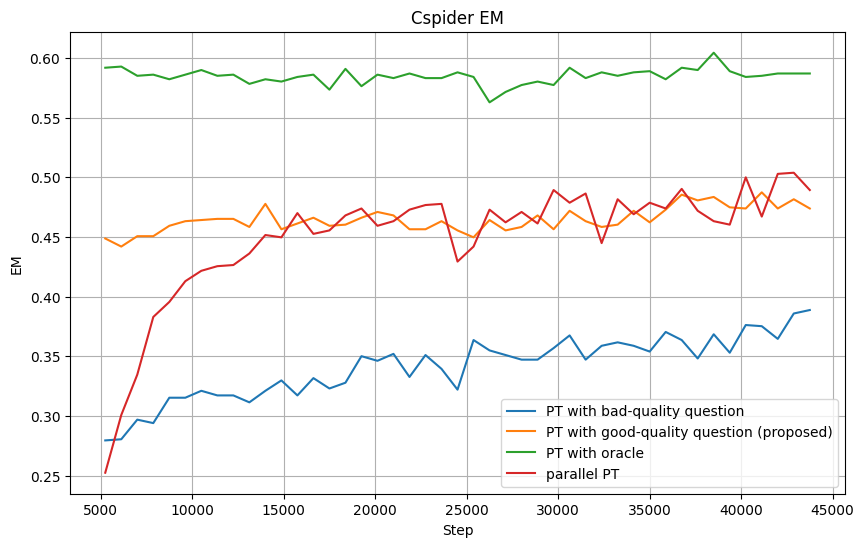

In [4]:
import matplotlib.pyplot as plt

# Data for the steps and corresponding values
steps = [5250, 6125, 7000, 7875, 8750, 9625, 10500, 11375, 12250, 13125, 14000,
         14875, 15750, 16625, 17500, 18375, 19250, 20125, 21000, 21875, 22750,
         23625, 24500, 25375, 26250, 27125, 28000, 28875, 29750, 30625, 31500,
         32375, 33250, 34125, 35000, 35875, 36750, 37625, 38500, 39375, 40250,
         41125, 42000, 42875, 43750]

zh_decoder_gen_text2sql = [0.279497099, 0.280464217, 0.296905222, 0.294003868, 0.315280464,
                           0.315280464, 0.321083172, 0.3172147, 0.3172147, 0.311411992,
                           0.321083172, 0.329787234, 0.3172147, 0.33172147, 0.323017408,
                           0.327852998, 0.350096712, 0.34622824, 0.352030948, 0.332688588,
                           0.35106383, 0.339458414, 0.32205029, 0.363636364, 0.354932302,
                           0.35106383, 0.347195358, 0.347195358, 0.356866538, 0.367504836,
                           0.347195358, 0.358800774, 0.361702128, 0.358800774, 0.353965184,
                           0.37040619, 0.363636364, 0.348162476, 0.368471954, 0.352998066,
                           0.376208897, 0.375241779, 0.364603482, 0.385880077, 0.388781431]

zh_encoder_gen_text2sql = [0.448742747, 0.441972921, 0.450676983, 0.450676983, 0.459381044,
                           0.463249516, 0.464216634, 0.465183752, 0.465183752, 0.458413926,
                           0.477756286, 0.456479691, 0.46131528, 0.46615087, 0.459381044,
                           0.460348162, 0.46615087, 0.47098646, 0.468085106, 0.456479691,
                           0.456479691, 0.463249516, 0.455512573, 0.449709865, 0.464216634,
                           0.455512573, 0.458413926, 0.468085106, 0.456479691, 0.471953578,
                           0.463249516, 0.458413926, 0.460348162, 0.471953578, 0.462282398,
                           0.472920696, 0.48549323, 0.48065764, 0.483558994, 0.474854932,
                           0.473887814, 0.487427466, 0.473887814, 0.481624758, 0.473887814]

oracle_zh = [0.591876209, 0.592843327, 0.585106383, 0.586073501, 0.582205029,
             0.586073501, 0.589941973, 0.585106383, 0.586073501, 0.578336557,
             0.582205029, 0.580270793, 0.584139265, 0.586073501, 0.573500967,
             0.590909091, 0.576402321, 0.586073501, 0.583172147, 0.587040619,
             0.583172147, 0.583172147, 0.588007737, 0.584139265, 0.562862669,
             0.571566731, 0.577369439, 0.580270793, 0.577369439, 0.591876209,
             0.583172147, 0.588007737, 0.585106383, 0.588007737, 0.588974855,
             0.582205029, 0.591876209, 0.589941973, 0.604448743, 0.588974855,
             0.584139265, 0.585106383, 0.587040619, 0.587040619, 0.587040619]

eval_mt5_large_19 = [0.252417795, 0.300773694, 0.334622824, 0.382978723, 0.395551257,
                     0.412959381, 0.421663443, 0.425531915, 0.426499033, 0.436170213,
                     0.451644101, 0.449709865, 0.470019342, 0.452611219, 0.455512573,
                     0.468085106, 0.473887814, 0.459381044, 0.463249516, 0.472920696,
                     0.476789168, 0.477756286, 0.429400387, 0.441972921, 0.472920696,
                     0.462282398, 0.47098646, 0.46131528, 0.489361702, 0.478723404,
                     0.486460348, 0.444874275, 0.481624758, 0.469052224, 0.478723404,
                     0.473887814, 0.49032882, 0.471953578, 0.463249516, 0.460348162,
                     0.5, 0.467117988, 0.502901354, 0.503868472, 0.489361702]

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(steps, zh_decoder_gen_text2sql, label='PT with bad-quality question')
plt.plot(steps, zh_encoder_gen_text2sql, label='PT with good-quality question (proposed)')
plt.plot(steps, oracle_zh, label='PT with oracle')
plt.plot(steps, eval_mt5_large_19, label='parallel PT')

plt.xlabel('Step')
plt.ylabel('EM')
plt.title('Cspider EM')
plt.legend()
plt.grid(True)
plt.show()


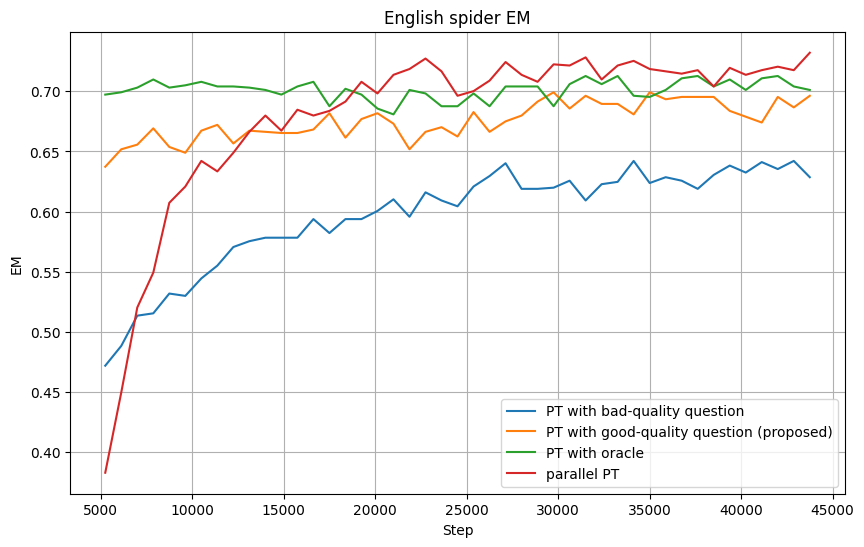

In [7]:
import matplotlib.pyplot as plt

# Data for the steps and corresponding values
steps = [5250, 6125, 7000, 7875, 8750, 9625, 10500, 11375, 12250, 13125, 14000,
         14875, 15750, 16625, 17500, 18375, 19250, 20125, 21000, 21875, 22750,
         23625, 24500, 25375, 26250, 27125, 28000, 28875, 29750, 30625, 31500,
         32375, 33250, 34125, 35000, 35875, 36750, 37625, 38500, 39375, 40250,
         41125, 42000, 42875, 43750]

zh_decoder_gen_text2sql = [0.471953578, 0.488394584, 0.513539652, 0.515473888, 0.531914894,
                           0.529980658, 0.544487427, 0.555125725, 0.570599613, 0.575435203,
                           0.578336557, 0.578336557, 0.578336557, 0.593810445, 0.582205029,
                           0.593810445, 0.593810445, 0.600580271, 0.610251451, 0.595744681,
                           0.616054159, 0.609284333, 0.604448743, 0.620889749, 0.62959381,
                           0.640232108, 0.618955513, 0.618955513, 0.619922631, 0.625725338,
                           0.609284333, 0.622823985, 0.624758221, 0.642166344, 0.623791103,
                           0.628626692, 0.625725338, 0.618955513, 0.630560928, 0.638297872,
                           0.632495164, 0.641199226, 0.635396518, 0.642166344, 0.628626692]

zh_encoder_gen_text2sql = [0.637330754, 0.651837524, 0.655705996, 0.669245648, 0.65377176,
                           0.64893617, 0.667311412, 0.672147002, 0.656673114, 0.667311412,
                           0.666344294, 0.665377176, 0.665377176, 0.66827853, 0.681818182,
                           0.661508704, 0.676982592, 0.681818182, 0.67311412, 0.651837524,
                           0.666344294, 0.670212766, 0.662475822, 0.6827853, 0.666344294,
                           0.675048356, 0.679883946, 0.691489362, 0.699226306, 0.685686654,
                           0.696324952, 0.689555126, 0.689555126, 0.680851064, 0.699226306,
                           0.693423598, 0.695357834, 0.695357834, 0.695357834, 0.683752418,
                           0.678916828, 0.674081238, 0.695357834, 0.686653772, 0.696324952]

oracle_zh = [0.69729207, 0.699226306, 0.703094778, 0.709864603, 0.703094778,
             0.705029014, 0.707930368, 0.704061896, 0.704061896, 0.703094778,
             0.701160542, 0.69729207, 0.704061896, 0.707930368, 0.68762089,
             0.70212766, 0.69729207, 0.685686654, 0.680851064, 0.701160542,
             0.698259188, 0.68762089, 0.68762089, 0.698259188, 0.68762089,
             0.704061896, 0.704061896, 0.704061896, 0.68762089, 0.705996132,
             0.712765957, 0.705996132, 0.712765957, 0.696324952, 0.695357834,
             0.701160542, 0.710831721, 0.712765957, 0.704061896, 0.709864603,
             0.701160542, 0.710831721, 0.712765957, 0.704061896, 0.701160542]

eval_mt5_large_19 = [0.382978723, 0.449709865, 0.520309478, 0.549323017, 0.607350097,
                     0.620889749, 0.642166344, 0.633462282, 0.64893617, 0.666344294,
                     0.679883946, 0.667311412, 0.684719536, 0.679883946, 0.683752418,
                     0.691489362, 0.707930368, 0.698259188, 0.713733075, 0.718568665,
                     0.727272727, 0.716634429, 0.696324952, 0.700193424, 0.708897485,
                     0.724371373, 0.713733075, 0.707930368, 0.722437137, 0.721470019,
                     0.728239845, 0.709864603, 0.721470019, 0.725338491, 0.718568665,
                     0.716634429, 0.714700193, 0.717601547, 0.704061896, 0.719535783,
                     0.713733075, 0.717601547, 0.720502901, 0.717601547, 0.732108317]

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(steps, zh_decoder_gen_text2sql, label='PT with bad-quality question')
plt.plot(steps, zh_encoder_gen_text2sql, label='PT with good-quality question (proposed)')
plt.plot(steps, oracle_zh, label='PT with oracle')
plt.plot(steps, eval_mt5_large_19, label='parallel PT')

plt.xlabel('Step')
plt.ylabel('EM')
plt.title('English spider EM')

plt.legend()
plt.grid(True)
plt.show()


# Korean translation

In [ ]:
import json 
import pandas as pd 

korean_dev_path = "/home/deokhk/research/ZX-seq2seq/data/spider/dev_translated_to_ko.json"
with open(korean_dev_path, 'r') as f:
    korean_dev = json.load(f)

# Extract db_id, original_question, question, sql fields and save it into excel file 
korean_dev_df = pd.DataFrame(korean_dev)
korean_dev_df = korean_dev_df[["db_id", "original_question", "question", "query"]]
korean_dev_df.to_excel("./korean_dev.xlsx", index=False)


# Syntheic data, test

In [1]:
import json 
syn_path= "/home/deokhk/research/ZX-seq2seq/data/synthetic_seq2seq/spider_new-examples-no-question-6-128_seq2seq.json"
with open(syn_path, 'r') as f:
    syn_raw = json.load(f)

In [2]:
sampled = syn_raw[0:100]
save_path = "/home/deokhk/research/ZX-seq2seq/data/synthetic_seq2seq/syn_seq2seq_sampled.json"
with open(save_path, 'w') as f:
    json.dump(sampled, f, indent=4)

In [2]:
# Update format 
import json 
paths = [
    "/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_enc_except_final_generated_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq.json",
    "/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq.json",
    "/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_wschema_generated_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq.json"
]

for p in paths:
    with open(p, 'r') as f:
        raw = json.load(f)
    for example in raw:
        gen_q = example["generated_question"]
        ori_q = example["original_question"]
        example["input_sequence"] = example["input_sequence"].replace(ori_q, gen_q).strip()
    with open(p, 'w') as f:
        json.dump(raw, f, indent=4, ensure_ascii=False)

In [4]:
import json 
with open("/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_wschema_generated_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq.json", 'r') as f:
    raw = json.load(f)

sampled = raw[0:20]
with open("/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_wschema_generated_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq_sampled.json", 'w') as f:
    json.dump(sampled, f, indent=4, ensure_ascii=False)

In [3]:
# Sample 

sampled = raw[0:200]
save_path = "/home/deokhk/research/ZX-seq2seq/data/RT_consistency/sampled_OneM_wschema_generated_predictions_zh_beam_4.json"
with open(save_path, 'w') as f:
    json.dump(sampled, f, indent=4, ensure_ascii=False)

In [1]:
import json 
with open("/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_wschema_generated_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq.json", 'r') as f:
    raw = json.load(f)

sampled = raw[0:1000]
with open("/home/deokhk/research/ZX-seq2seq/data/RT_consistency/OneM_wschema_generated_predictions_zh_beam_4_from_spider_new-examples-no-question-6-128_seq2seq_sampled.json", 'w') as f:
    json.dump(sampled, f, indent=4, ensure_ascii=False)